#### Load relevant libraries and scripts

The following libraries are required: numpy, matplotlib, keras, tensorflow, vtk, h5py, scikit-learn, scipy

In [1]:
import os
import pathlib
import numpy as np

from melis_dickinson_2023_figs.make_figures import FigureGen

FG = FigureGen()

# Create a plotting directory where the figures are saved:
plot_loc = pathlib.Path().cwd() / 'plots'
FG.set_plot_loc(plot_loc)

2023-11-14 15:32:23.905607: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 15:32:23.941990: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 15:32:23.942891: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 15:32:25.401057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Figure 3

For this figure we need to load the muscle-activity and wing-motion dataset from an hdf5 file. Subsequently we will construct the muscle-to-wing-motion CNN used to predict wing motion from muscle activity and wingbeat frequency traces.

In [2]:
# Load the dataset:
file_loc = pathlib.Path().cwd() / 'dataset'
file_name = file_loc / 'dataset_05_06_2021_08_07_57.h5'
FG.load_dataset(file_name)

# Remove outliers and scale the dataset:
outliers = np.array([
    [18,0,100],
    [230,0,1000],
    [231,0,1000],
    [232,0,1000],
    [261,0,50],
    [338,0,1000],
    [345,100,150],
    [346,0,1000],
    [354,0,120]
])

FG.create_dataset(outliers)

# Construct the CNN and load weights:
N_filters = 64
weights_loc = pathlib.Path().cwd() / 'weights'
FG.load_network(N_filters, weights_loc)

Number of files: {self.N_files}
file nr: 1
file nr: 2
file nr: 3
file nr: 4
file nr: 5
file nr: 6
file nr: 7
file nr: 8
file nr: 9
file nr: 10
file nr: 11
file nr: 12
file nr: 13
file nr: 14
file nr: 15
file nr: 16
file nr: 17
file nr: 18
file nr: 19
file nr: 20
file nr: 21
file nr: 22
file nr: 23
file nr: 24
file nr: 25
file nr: 26
file nr: 27
file nr: 28
file nr: 29
file nr: 30
file nr: 31
file nr: 32
file nr: 33
file nr: 34
file nr: 35
file nr: 36
file nr: 37
file nr: 38
file nr: 39
file nr: 40
file nr: 41
file nr: 42
file nr: 43
file nr: 44
file nr: 45
file nr: 46
file nr: 47
file nr: 48
file nr: 49
file nr: 50
file nr: 51
file nr: 52
file nr: 53
file nr: 54
file nr: 55
file nr: 56
file nr: 57
file nr: 58
file nr: 59
file nr: 60
file nr: 61
file nr: 62
file nr: 63
file nr: 64
file nr: 65
file nr: 66
file nr: 67
file nr: 68
file nr: 69
file nr: 70
file nr: 71
file nr: 72
file nr: 73
file nr: 74
total number of movies: 377


/home/wbd/.pyenv/versions/3.11.4/envs/melis_figs/lib/python3.11/site-packages/scipy/interpolate/_fitpack_impl.py:285: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/home/wbd/.pyenv/versions/3.11.4/envs/melis_figs/lib/python3.11/site-packages/scipy/interpolate/_fitpack_impl.py:285: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


(76270, 9, 13)
(76270, 80)
N train: 61351
N test: 10868
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9, 13, 1)]        0         
                                                                 
 model (Functional)          (None, 256)               213888    
                                                                 
 model_1 (Functional)        (None, 80)                345168    
                                                                 
Total params: 559,056
Trainable params: 559,056
Non-trainable params: 0
_________________________________________________________________
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 13, 1)]        0         
                                                

7/7 [==============================] - 0s 2ms/step
(215, 9, 13)


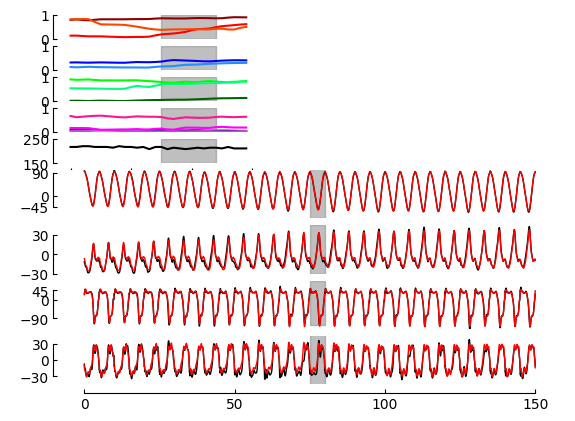

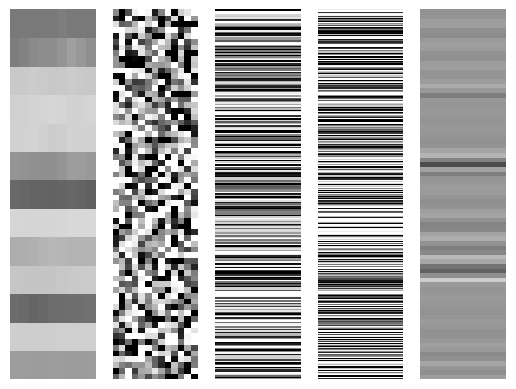

In [3]:
# Plot figure 3:
FG.figure_3()

#### Figure 4

First we create Extended Data Figure 4 by selecting wingbeats that have a muscle activity gradient larger than $0.01$ for a specific muscle. We subsequently use RNWe use the intercepts found in Extended Data Figure 4 to explore the coupled mucscle-activity & wing-motion space. First we establish a baseline muscle activity, based on a video sequence in which neither muscle activity nor wing motion changes significantly. Using the muscle-to-wing-motion CNN we can subsequently predict the associated wing motion pattern, the so-called baseline wing motion. From the baseline muscle activity pattern we can use the intercepts of Extended Data Figure 4 to move to the maximum muscle activity pattern for a specific muscle. The maximum muscle activity pattern is subsequently fed into the CNN to construct the maximum muscle activity wing motion pattern.

In [ ]:
FG.figures_4()

muscle b1
n pts: 7158
[[ 1.        ]
 [ 0.12832206]
 [ 0.09238665]
 [-0.28797561]
 [-0.19731715]
 [ 0.07019019]
 [ 0.23021392]
 [ 0.08011637]
 [-0.19768132]
 [-0.11188655]
 [ 0.28889205]
 [-0.07425025]
 [ 0.01199232]]
[-9.99200722e-16 -3.02990623e-02  5.91642903e-01  6.13092436e-01
  6.32118569e-01  8.98239724e-02  3.88715082e-01  4.76825064e-01
  5.38039681e-01  4.55589846e-01  2.21413736e-01  5.04317505e-01
  4.99965398e-01]


/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:716: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,i].scatter(m_mean[i],reg.coef_[0]*m_mean[i]+reg.intercept_[0],s=70,c=c_gray,marker='.',zorder=10)
/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:717: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1,i]

muscle b2
n pts: 3615
[[ 0.37342069]
 [ 1.        ]
 [-0.12905576]
 [ 0.06922697]
 [ 0.19686864]
 [ 0.2641989 ]
 [-0.03887946]
 [ 0.49957156]
 [-0.14829262]
 [-0.04294432]
 [ 0.20082373]
 [ 0.39875741]
 [-0.02275221]]
[7.03780564e-01 1.66533454e-16 5.74688202e-01 3.03820820e-01
 4.78792118e-01 1.39129205e-01 6.05246606e-01 5.58252148e-01
 3.02457029e-01 3.37158966e-01 4.83402980e-01 4.70291449e-01
 5.04230969e-01]


/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:716: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,i].scatter(m_mean[i],reg.coef_[0]*m_mean[i]+reg.intercept_[0],s=70,c=c_gray,marker='.',zorder=10)
/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:717: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1,i]

muscle b3
n pts: 8790
[[ 0.10175351]
 [-0.0289081 ]
 [ 1.        ]
 [ 0.60936095]
 [ 0.44672841]
 [ 0.06482106]
 [-0.36321917]
 [ 0.01339347]
 [ 0.39687503]
 [ 0.38359173]
 [-0.07114913]
 [ 0.15507821]
 [-0.09501223]]
[6.41687753e-01 1.78246886e-01 4.44089210e-16 4.16093805e-03
 2.52670352e-01 1.28479307e-01 7.76253428e-01 5.95459714e-01
 9.78593625e-02 1.10686378e-01 4.87937839e-01 4.37442568e-01
 5.89651743e-01]


/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:716: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,i].scatter(m_mean[i],reg.coef_[0]*m_mean[i]+reg.intercept_[0],s=70,c=c_gray,marker='.',zorder=10)
/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:717: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1,i]

muscle i1
n pts: 7199
[[-0.28118239]
 [-0.06887706]
 [ 0.34699723]
 [ 1.        ]
 [ 0.65785835]
 [ 0.23817778]
 [-0.672399  ]
 [ 0.07291389]
 [ 0.80562705]
 [ 0.65387356]
 [-0.15698651]
 [ 0.18609021]
 [-0.06327167]]
[8.12553191e-01 1.23394603e-01 5.42869176e-01 2.55351296e-15
 2.46253786e-01 9.91947163e-03 8.23122359e-01 5.27312140e-01
 4.28731155e-02 8.07160951e-02 4.54314800e-01 4.13812778e-01
 5.59739229e-01]


/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:716: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,i].scatter(m_mean[i],reg.coef_[0]*m_mean[i]+reg.intercept_[0],s=70,c=c_gray,marker='.',zorder=10)
/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:717: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1,i]

muscle i2
n pts: 6856
[[-0.20693043]
 [-0.03315594]
 [ 0.35806302]
 [ 0.89191021]
 [ 1.        ]
 [ 0.24672553]
 [-0.82252831]
 [ 0.19050678]
 [ 0.81113882]
 [ 0.78043868]
 [-0.17864288]
 [ 0.34054901]
 [-0.00375024]]
[ 7.85149439e-01  1.02654434e-01  4.70947885e-01 -1.55842492e-02
 -2.10942375e-15  3.45264749e-03  9.43959893e-01  4.48795009e-01
 -2.36199392e-03 -2.21976858e-02  4.81168009e-01  2.95013105e-01
  5.17325744e-01]


/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:716: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,i].scatter(m_mean[i],reg.coef_[0]*m_mean[i]+reg.intercept_[0],s=70,c=c_gray,marker='.',zorder=10)
/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:717: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1,i]

muscle iii1
n pts: 4110
[[ 0.19956208]
 [ 0.33838842]
 [ 0.03475206]
 [ 0.40801914]
 [ 0.44666796]
 [ 1.        ]
 [-0.36028008]
 [ 0.47306613]
 [ 0.1772922 ]
 [ 0.35156872]
 [ 0.3636197 ]
 [ 0.33686179]
 [-0.05405942]]
[6.06459083e-01 7.40306589e-03 6.10887771e-01 3.42956757e-01
 4.39648359e-01 3.88578059e-16 6.02902120e-01 4.70704161e-01
 3.59920732e-01 3.16896848e-01 3.61361207e-01 4.42494258e-01
 5.19246618e-01]


/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:716: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,i].scatter(m_mean[i],reg.coef_[0]*m_mean[i]+reg.intercept_[0],s=70,c=c_gray,marker='.',zorder=10)
/home/wbd/work/projects/johan/packaged/melis_dickinson_2023_figs/melis_dickinson_2023_figs/make_figures.py:717: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1,i]

muscle iii24
n pts: 9963
[[ 0.17889991]
 [ 0.07425896]
 [-0.2682508 ]
 [-0.85308433]
 [-0.7781479 ]
 [-0.22647498]
 [ 1.        ]
 [-0.07246615]
 [-0.85508714]
 [-0.79096514]
 [ 0.06979834]
 [-0.11599016]
 [ 0.06029119]]
[5.88827413e-01 5.60016799e-02 8.07859899e-01 8.54279250e-01
 9.42225458e-01 2.42364604e-01 1.27675648e-15 6.03769977e-01
 8.21593209e-01 7.62585345e-01 3.71216920e-01 5.54111708e-01
 5.04011882e-01]
